# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 612


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | puerto natales
Processing Record 2 of Set 1 | poykovskiy
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | vennesla
Processing Record 5 of Set 1 | raja
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | codrington
Processing Record 8 of Set 1 | mansalay
Processing Record 9 of Set 1 | diego de almagro
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | papatowai
Processing Record 12 of Set 1 | edinburgh of the seven seas
Processing Record 13 of Set 1 | whitehorse
Processing Record 14 of Set 1 | pangkalpinang
Processing Record 15 of Set 1 | taiohae
City not found. Skipping...
Processing Record 16 of Set 1 | grytviken
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | olonkinbyen
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | port saint john's
Proces

Processing Record 40 of Set 4 | banda aceh
Processing Record 41 of Set 4 | carnarvon
Processing Record 42 of Set 4 | doka
Processing Record 43 of Set 4 | conceicao da barra
Processing Record 44 of Set 4 | beloyarskiy
Processing Record 45 of Set 4 | mount isa
Processing Record 46 of Set 4 | keflavik
Processing Record 47 of Set 4 | new norfolk
Processing Record 48 of Set 4 | bardsir
Processing Record 49 of Set 4 | soe
Processing Record 0 of Set 5 | quartu sant'elena
Processing Record 1 of Set 5 | chibougamau
Processing Record 2 of Set 5 | gobabis
Processing Record 3 of Set 5 | kyzyl-mazhalyk
Processing Record 4 of Set 5 | phalaborwa
Processing Record 5 of Set 5 | hailey
Processing Record 6 of Set 5 | pointe-noire
Processing Record 7 of Set 5 | ust-nera
Processing Record 8 of Set 5 | hafnarfjordur
Processing Record 9 of Set 5 | shingu
Processing Record 10 of Set 5 | jackson
Processing Record 11 of Set 5 | ciudad lazaro cardenas
Processing Record 12 of Set 5 | eket
Processing Record 13 of 

Processing Record 30 of Set 8 | acapulco de juarez
Processing Record 31 of Set 8 | nantucket
Processing Record 32 of Set 8 | tual
Processing Record 33 of Set 8 | touros
Processing Record 34 of Set 8 | coquimbo
Processing Record 35 of Set 8 | constantia
Processing Record 36 of Set 8 | hampton
Processing Record 37 of Set 8 | igrim
Processing Record 38 of Set 8 | ulysses
Processing Record 39 of Set 8 | abepura
Processing Record 40 of Set 8 | agogo
Processing Record 41 of Set 8 | conde
Processing Record 42 of Set 8 | galveston
Processing Record 43 of Set 8 | cheremukhovo
Processing Record 44 of Set 8 | bertioga
Processing Record 45 of Set 8 | paramirim
Processing Record 46 of Set 8 | mana
Processing Record 47 of Set 8 | broome
Processing Record 48 of Set 8 | pasni
Processing Record 49 of Set 8 | yemetsk
Processing Record 0 of Set 9 | pyin oo lwin
Processing Record 1 of Set 9 | yuzhno-kurilsk
Processing Record 2 of Set 9 | qui nhon
Processing Record 3 of Set 9 | ocean pointe
City not found.

Processing Record 24 of Set 12 | santa rosa del sara
City not found. Skipping...
Processing Record 25 of Set 12 | castillos
Processing Record 26 of Set 12 | machico
Processing Record 27 of Set 12 | aldan
Processing Record 28 of Set 12 | ciudad pemex
Processing Record 29 of Set 12 | polyarnyy
Processing Record 30 of Set 12 | fomboni
Processing Record 31 of Set 12 | ouesso
Processing Record 32 of Set 12 | kitimat
Processing Record 33 of Set 12 | khorol'
City not found. Skipping...
Processing Record 34 of Set 12 | mokhotlong
Processing Record 35 of Set 12 | toliara
Processing Record 36 of Set 12 | coronel dorrego
Processing Record 37 of Set 12 | cooper's town
Processing Record 38 of Set 12 | cedral
Processing Record 39 of Set 12 | miri
Processing Record 40 of Set 12 | east ballina
Processing Record 41 of Set 12 | greenland
Processing Record 42 of Set 12 | atherton
Processing Record 43 of Set 12 | belley
Processing Record 44 of Set 12 | haimen
Processing Record 45 of Set 12 | cole harbour


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          588
Lat           588
Lng           588
Max Temp      588
Humidity      588
Cloudiness    588
Wind Speed    588
Country       588
Date          588
dtype: int64

In [5]:
#"Max Temp" is in calvin, converting to celsius
city_data_df["Max Temp"] = city_data_df["Max Temp"]-273.15
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,puerto natales,-51.7236,-72.4875,2.18,71,7,2.27,CL,1700356708
1,poykovskiy,61.2333,73.3333,-16.66,77,0,3.00,RU,1700356708
2,albany,42.6001,-73.9662,1.89,65,0,0.89,US,1700356552
3,vennesla,58.2694,7.9741,1.82,93,100,7.20,NO,1700356709
4,raja,8.4596,25.6780,24.42,40,100,1.44,SS,1700356709


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,2.18,71,7,2.27,CL,1700356708
1,poykovskiy,61.2333,73.3333,-16.66,77,0,3.00,RU,1700356708
2,albany,42.6001,-73.9662,1.89,65,0,0.89,US,1700356552
3,vennesla,58.2694,7.9741,1.82,93,100,7.20,NO,1700356709
4,raja,8.4596,25.6780,24.42,40,100,1.44,SS,1700356709


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [8]:
#Converting the Unix Datatime stamp to month/days/years and time so will have the correct date in the graph titles no matter when the code is run
#Looked up how to do this on Stack Overflow
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"], unit = 's')
city_data_df["Date"] = pd.to_datetime(city_data_df["Date"])
city_data_df["Date y/m/d"] = pd.to_datetime(city_data_df["Date"]).dt.date
current_date = city_data_df["Date y/m/d"].iloc[0]
current_date
day = current_date.day
month = current_date.month
year = current_date.year

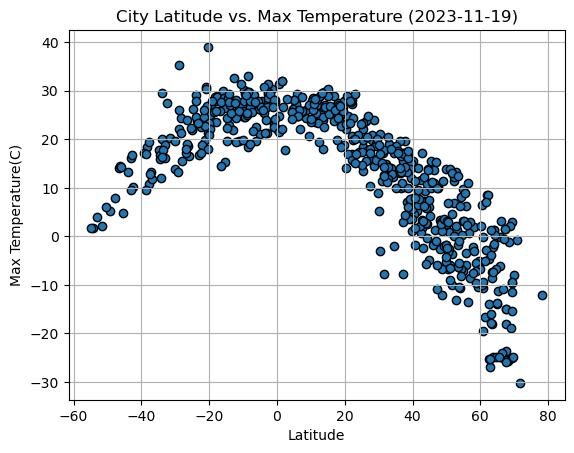

In [9]:
# Build scatter plot for latitude vs. temperature
lat = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
lat_vs_temp_plot = plt.scatter(lat, max_temp, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title(f"City Latitude vs. Max Temperature ({year}-{month}-{day})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

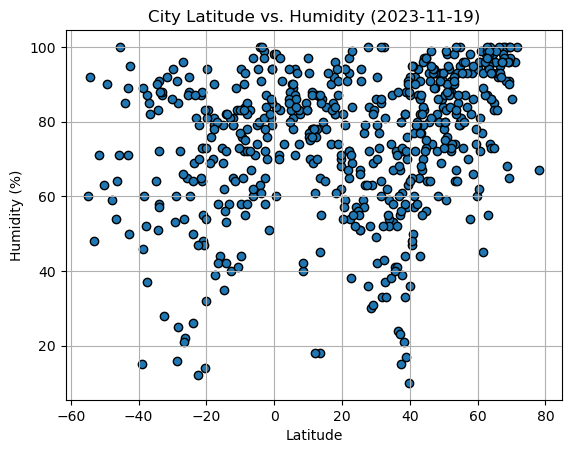

In [10]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
lat_vs_humidity_plot = plt.scatter(lat, humidity, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({year}-{month}-{day})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

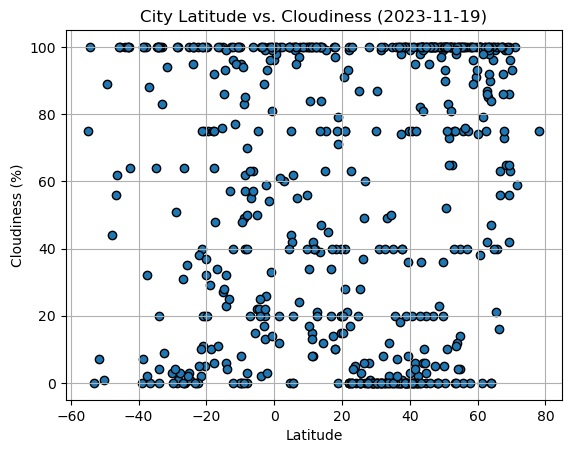

In [11]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
lat_vs_cloud_plot = plt.scatter(lat, cloudiness, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({year}-{month}-{day})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

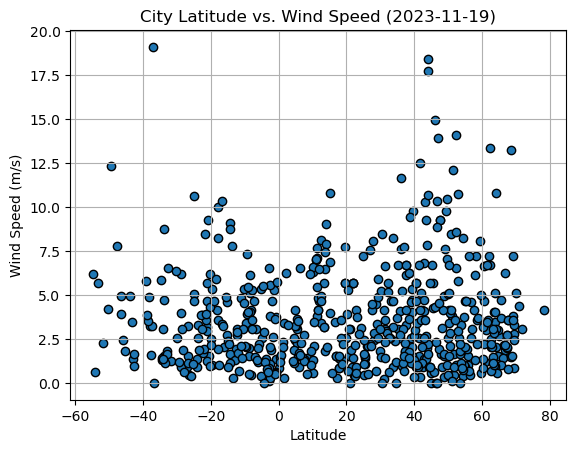

In [12]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
lat_vs_wind_plot = plt.scatter(lat, wind_speed, edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({year}-{month}-{day})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def lin_reg(x_values, y_values, x_line, y_line):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(x_line,y_line),fontsize=15,color="red")
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue**2}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Date y/m/d
City_ID,,,,,,,,,,
1,poykovskiy,61.2333,73.3333,-16.66,77,0,3.00,RU,2023-11-19 01:18:28,2023-11-19
2,albany,42.6001,-73.9662,1.89,65,0,0.89,US,2023-11-19 01:15:52,2023-11-19
3,vennesla,58.2694,7.9741,1.82,93,100,7.20,NO,2023-11-19 01:18:29,2023-11-19
4,raja,8.4596,25.6780,24.42,40,100,1.44,SS,2023-11-19 01:18:29,2023-11-19
5,jamestown,42.0970,-79.2353,6.77,80,0,5.14,US,2023-11-19 01:14:32,2023-11-19


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Date y/m/d
City_ID,,,,,,,,,,
0,puerto natales,-51.7236,-72.4875,2.18,71,7,2.27,CL,2023-11-19 01:18:28,2023-11-19
6,codrington,-38.2667,141.9667,18.34,60,100,4.86,AU,2023-11-19 01:18:29,2023-11-19
8,diego de almagro,-26.3667,-70.0500,18.62,22,0,0.43,CL,2023-11-19 01:18:29,2023-11-19
9,waitangi,-43.9535,-176.5597,13.23,85,100,4.92,NZ,2023-11-19 01:18:30,2023-11-19
10,papatowai,-46.5619,169.4708,14.14,54,56,3.89,NZ,2023-11-19 01:18:30,2023-11-19


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7681502774159186


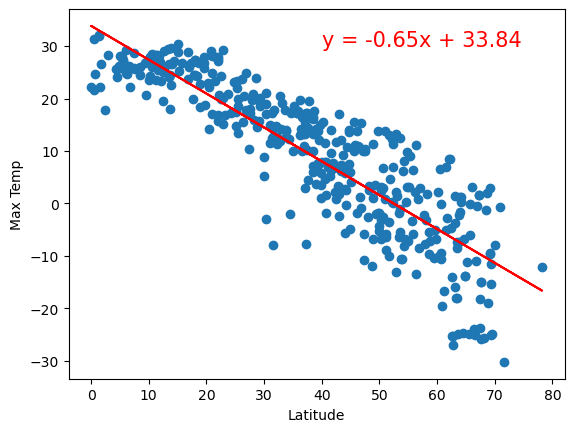

In [16]:
# Linear regression on Northern Hemisphere
lat = northern_hemi_df["Lat"]
max_temp = northern_hemi_df["Max Temp"]
lat_vs_temp_plot = plt.scatter(lat, max_temp)

#Axis labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

#Cordinates for positioning the regression equation on the graph
x_line = 40
y_line = 30

#Adding regression line
lin_reg(lat, max_temp, x_line, y_line)

# Show plot
plt.show()

The r-squared is: 0.5630155496245741


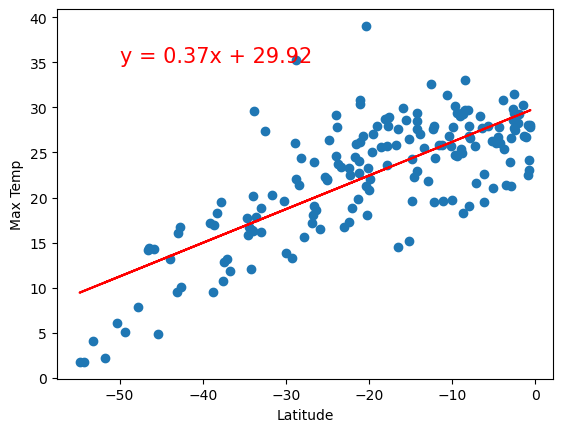

In [17]:
# Linear regression on Southern Hemisphere
lat = southern_hemi_df["Lat"]
max_temp = southern_hemi_df["Max Temp"]
lat_vs_temp_plot = plt.scatter(lat, max_temp)

#Axis labels
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

#Cordinates for positioning the regression equation on the graph
x_line = -50
y_line = 35

#Adding the regression line
lin_reg(lat, max_temp, x_line, y_line)

# Show plot
plt.show()

**Discussion about the linear relationship:** For the two above plots, the r-squared values, and the linear regressions show there is a relationship between latitude and maximum temperature of an area. For both the Northern and Southern hemispheres, in general, the closer you move towards the equator the higher the max temperature. The r-squared of the Northen Hemisphere is 0.73, showing a strong relationship between latitude and temperature, the r-squared for the Southern Hemisphere is less, 0.58, but this still shows a moderately strong relationship between latitude and temperature for the Southern hemispheres.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.05753672456337414


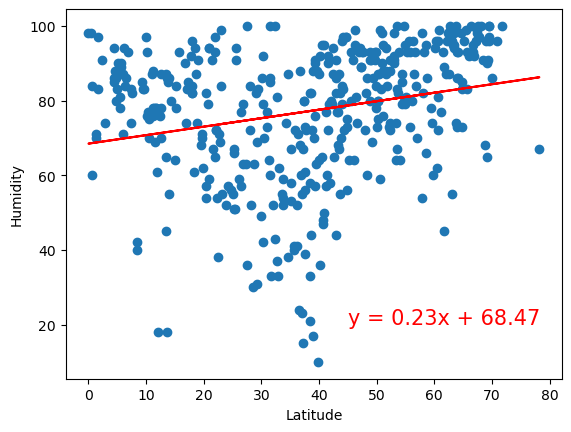

In [18]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
humidity = northern_hemi_df["Humidity"]
lat_vs_humidity_plot = plt.scatter(lat, humidity)

#Axis labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Cordinates for positioning the regression equation on the graph
x_line = 45
y_line = 20

#Adding regression line
lin_reg(lat, humidity, x_line, y_line)

plt.show()

The r-squared is: 0.026214249937677687


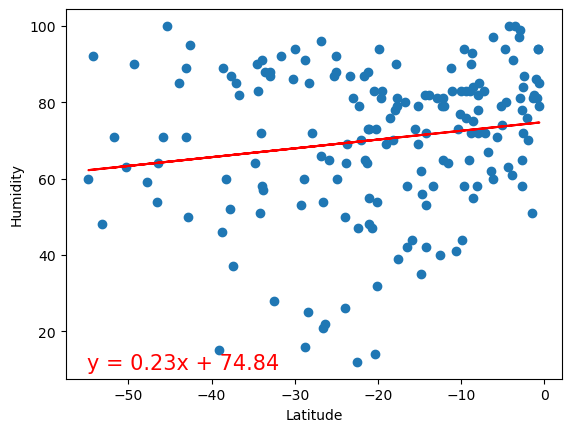

In [19]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
humidity = southern_hemi_df["Humidity"]
lat_vs_humidity_plot = plt.scatter(lat, humidity)

#Axis labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#Cordinates for positioning the regression equation on the graph
x_line = -55
y_line = 10

#Adding regression line
lin_reg(lat, humidity, x_line, y_line)

plt.show()

**Discussion about the linear relationship:** For the two above plots, the r-squared values, and the linear regressions show there is an extremely weak, if any, relationship between latitude and humidity of an area. While the linear regression line on the plot for the Northern Hemisphere does show as latitude increases humidity increases, the r-squared for the regression equation is 0.01, showing that the relation is at most very weak. The r-squared for the Southern Hemisphere is even lower, 0.0009, showing there is likely not a relationship between latitude and humidity for the Southern Hemisphere. Also, given that the regression line for the Souther Hemisphere is almost flat, this is pointing to there likely being no relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.04261718642307994


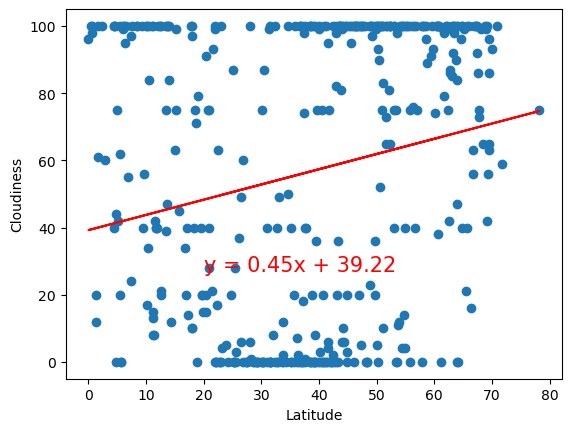

In [20]:
# Northern Hemisphere
lat = northern_hemi_df["Lat"]
cloudiness = northern_hemi_df["Cloudiness"]
lat_vs_cloud_plot = plt.scatter(lat, cloudiness)

#Axis labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Cordinates for positioning the regression equation on the graph
x_line = 20
y_line = 27

#Adding regression line
lin_reg(lat, cloudiness, x_line, y_line)

# Show plot
plt.show()

The r-squared is: 0.00016664224662475623


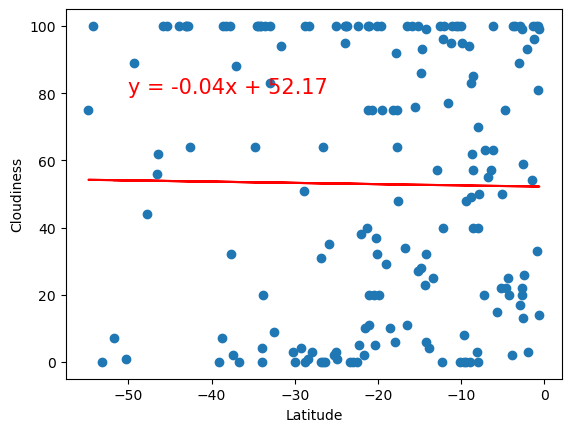

In [21]:
# Southern Hemisphere
lat = southern_hemi_df["Lat"]
cloudiness = southern_hemi_df["Cloudiness"]
lat_vs_cloud_plot = plt.scatter(lat, cloudiness)

#Axis labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#Cordinates for positioning the regression equation on the graph
x_line = -50
y_line = 80

#Adding regression line
lin_reg(lat, cloudiness, x_line, y_line)

# Show plot
plt.show()

**Discussion about the linear relationship:** Results for the relationship between latitude and cloudiness are similar to the results for the relationship between latitude and humidity, again showing a weak, if any relationship. The r-squared for the Northern Hemisphere is 0.03, while the r-squared for the Southern Hemisphere is 0.01, showing very little if any relationship between cloudiness and latitude, and giving the interpretation of the regression equation very little explanatory power.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.003391485107929266


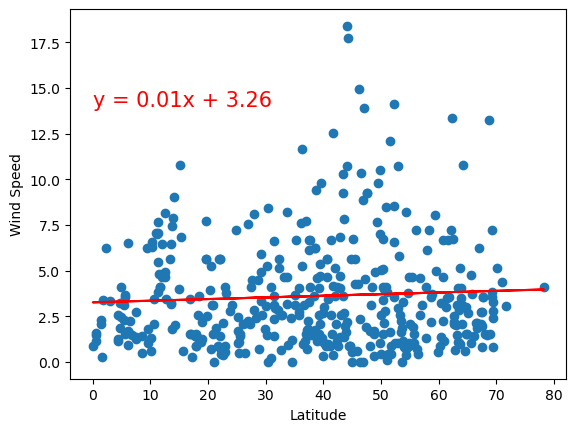

In [22]:
# Northern Hemisphere
# Build the scatter plots for latitude vs. wind speed
lat = northern_hemi_df["Lat"]
wind_speed = northern_hemi_df["Wind Speed"]
lat_vs_wind_plot = plt.scatter(lat, wind_speed)

#Axis labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Cordinates for positioning the regression equation on the graph
x_line = 0
y_line = 14

#Adding regression line
lin_reg(lat, wind_speed, x_line, y_line)

# Show plot
plt.show()

The r-squared is: 0.02381358040243673


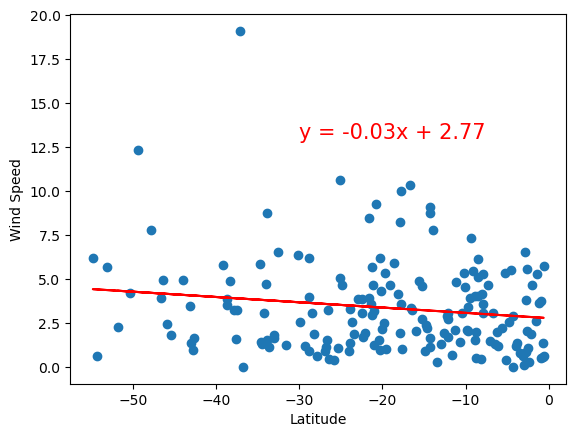

In [23]:
# Southern Hemisphere
# Build the scatter plots for latitude vs. wind speed
lat = southern_hemi_df["Lat"]
wind_speed = southern_hemi_df["Wind Speed"]
lat_vs_wind_plot = plt.scatter(lat, wind_speed)

#Axis labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#Cordinates for positioning the regression equation on the graph
x_line = -30
y_line = 13

#Adding regression line
lin_reg(lat, wind_speed, x_line, y_line)

# Show plot
plt.show()

**Discussion about the linear relationship:** The results for the relationship between latitude and wind speed also show a likely weak relationship, if any relationship. While the regression line for the Southern Hemisphere is showing as you move towards the equator wind speed decreases, the r-squared is 0.09, meaning this is at best a very weak relationship. The regression line for the Northern Hemisphere is almost flat and the r-squared is 0.002, showing for the Northern Hemisphere, there is very little if any relationship between latitude and wind speed.